In [1]:
import warnings
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']  #显示中文
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号
plt.rcParams['figure.dpi'] = 300
%matplotlib inline
# %config InlineBackend.figure_format = 'svg'
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None) # 显示所有列
from tqdm.notebook import tqdm
import geopandas as gpd
import transbigdata as tbd
import geoplot as gplt

In [3]:
df_all = pd.read_csv('E:/Data/mobike201803/final_data.csv')

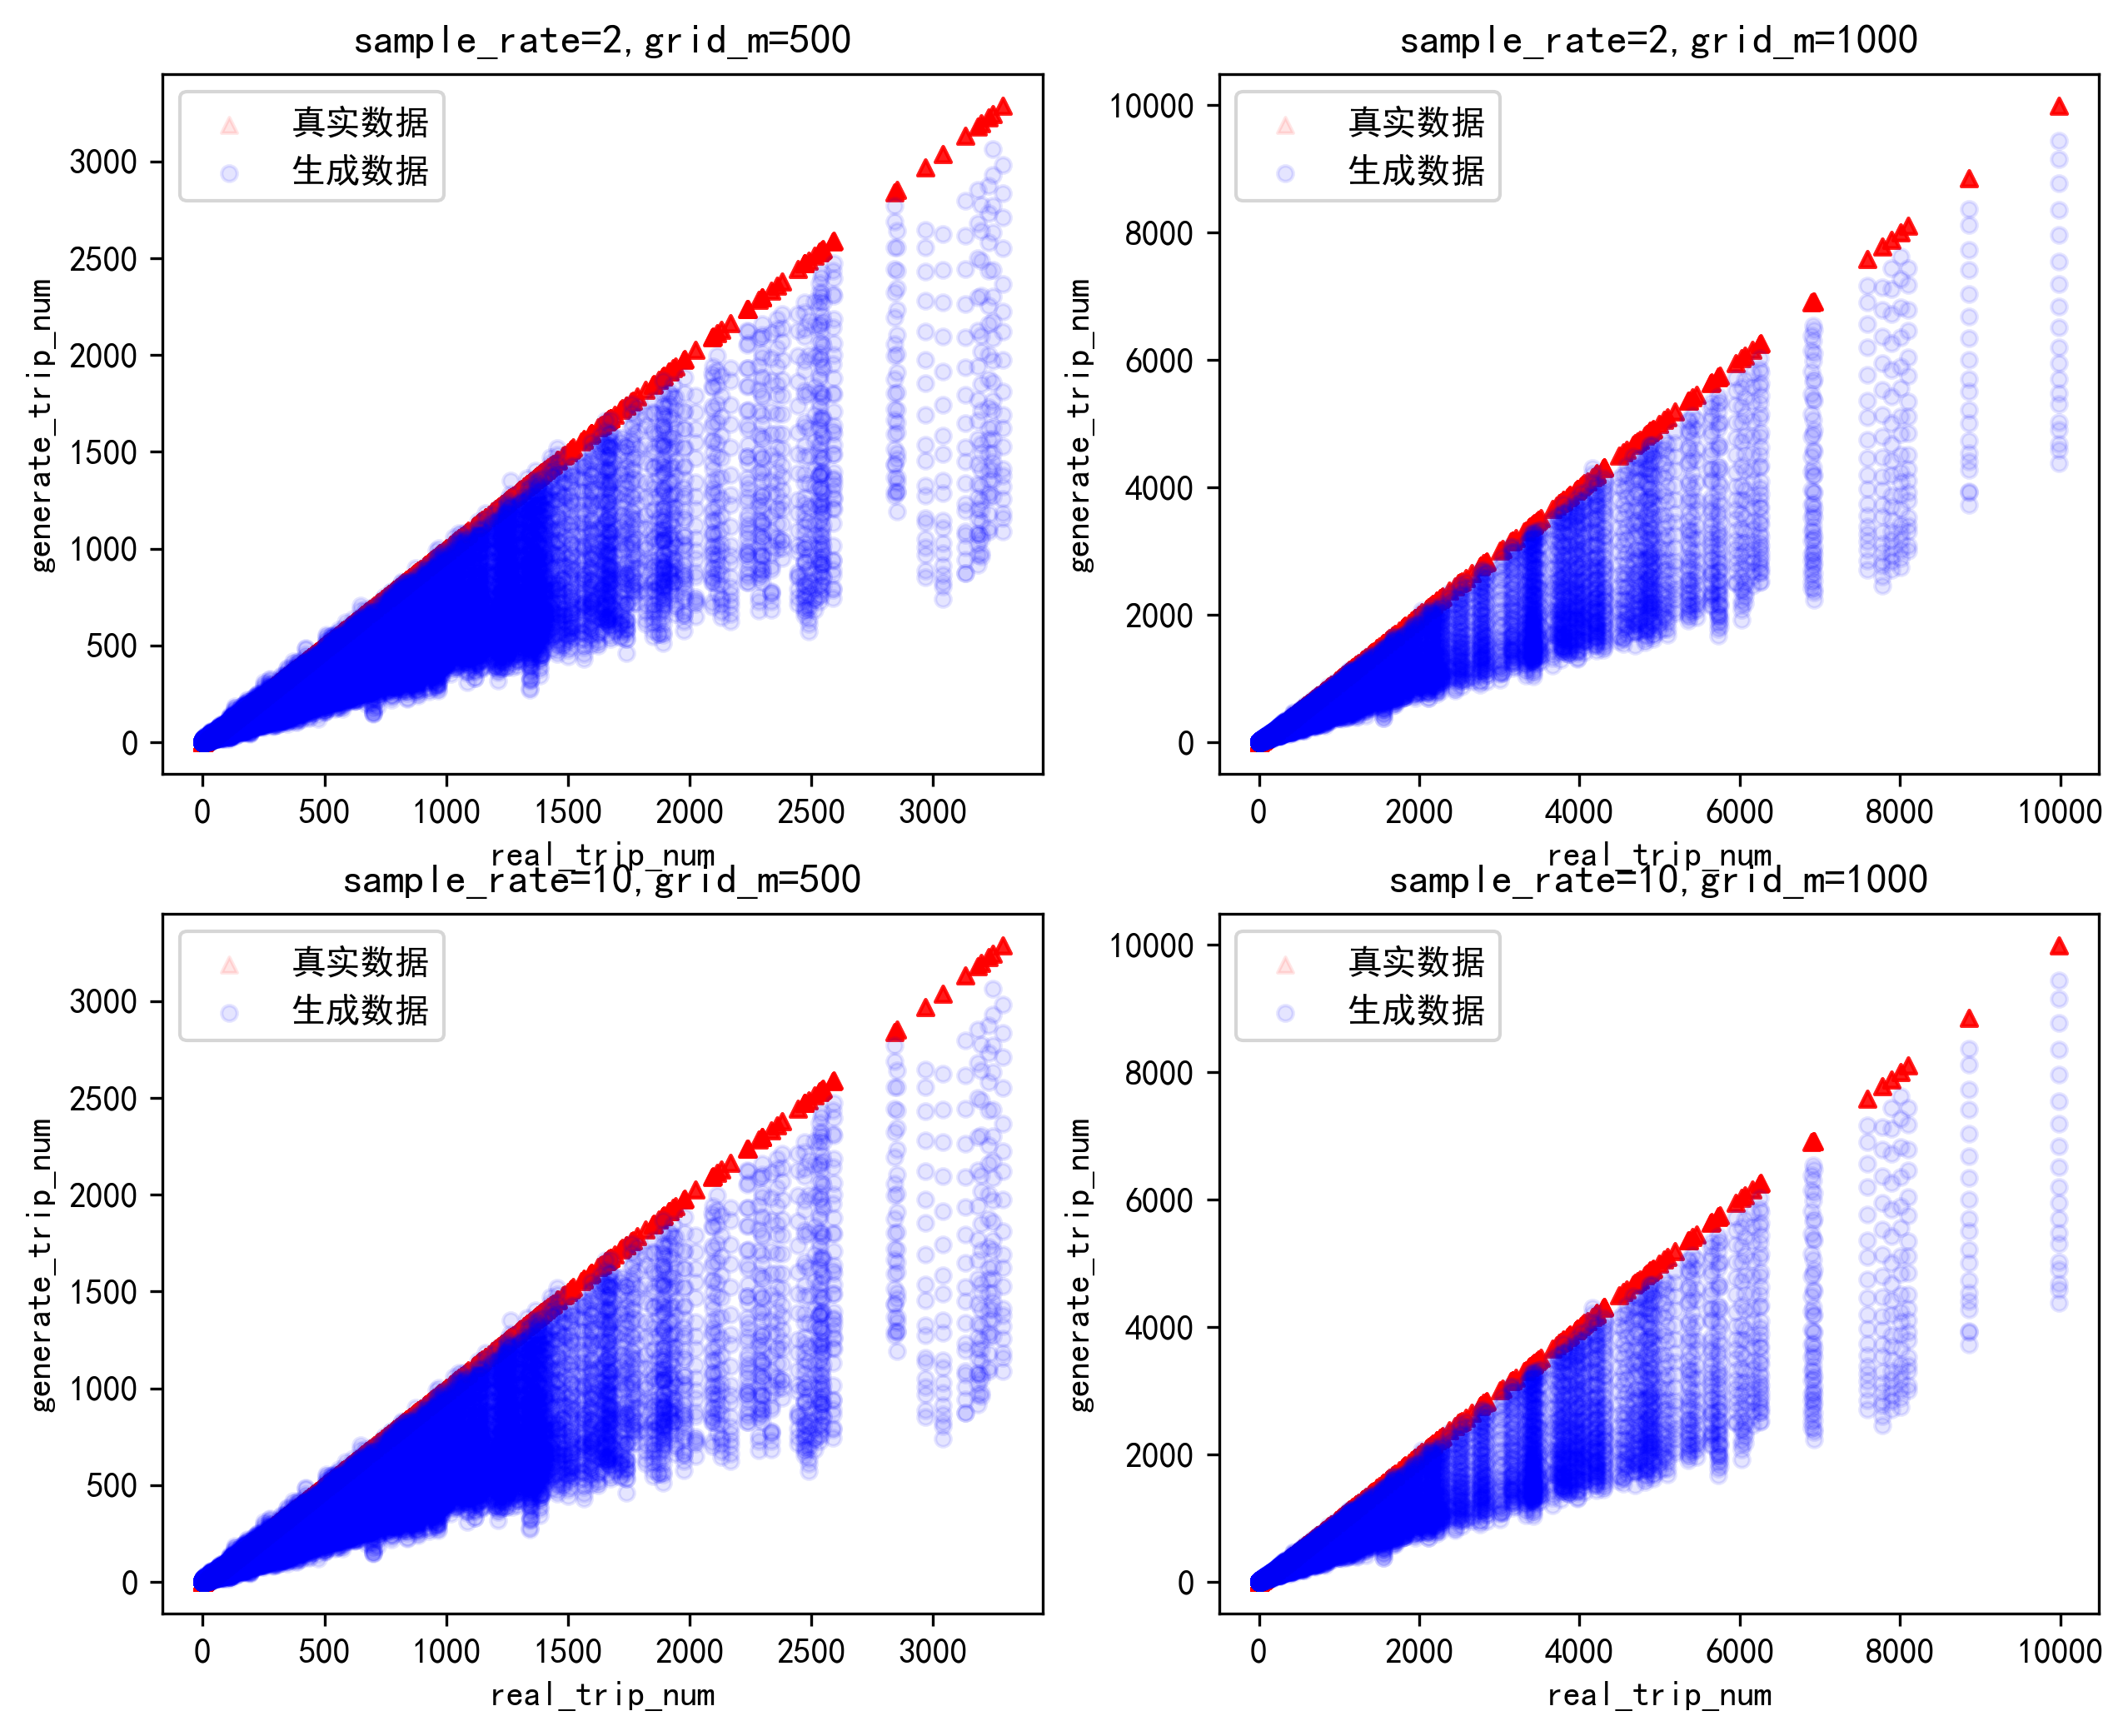

In [40]:
fig, axes = plt.subplots(2,2, figsize=(12, 8))  # 可使用GridSpec用法
i=0
for sample_rate in [2,10]:
    j = 0
    for grid_m in [500,1000]:
        ax = axes[i,j]
        df = df_all.query('sample == {}'.format(sample_rate) and 'grid_m == {}'.format(grid_m))

        df.plot(ax=ax, kind='scatter', x='real_trip_num', y='real_trip_num',
                color='red', marker='^', alpha=0.1, figsize=(10, 8),label='真实数据')
        df.plot(ax=ax, kind='scatter', x='real_trip_num',
                y='generate_trip_num', color='blue', alpha=0.1, figsize=(10, 8),label='生成数据')
        ax.set_title('sample_rate={},grid_m={}'.format(sample_rate,grid_m))
        j += 1
    i += 1
plt.savefig('C:/Users/yongqi/Desktop/采样率和网格尺寸的影响.jpg',dpi=600)

In [117]:
df_new = df_all[df_all.real_trip_num>0]
df_new['ratio_new'] = df_new.generate_trip_num / df_new.real_trip_num
dff = df_new.groupby(['samp_rate','grid_m'],as_index=False).agg({'ratio_new':'mean'})
dff

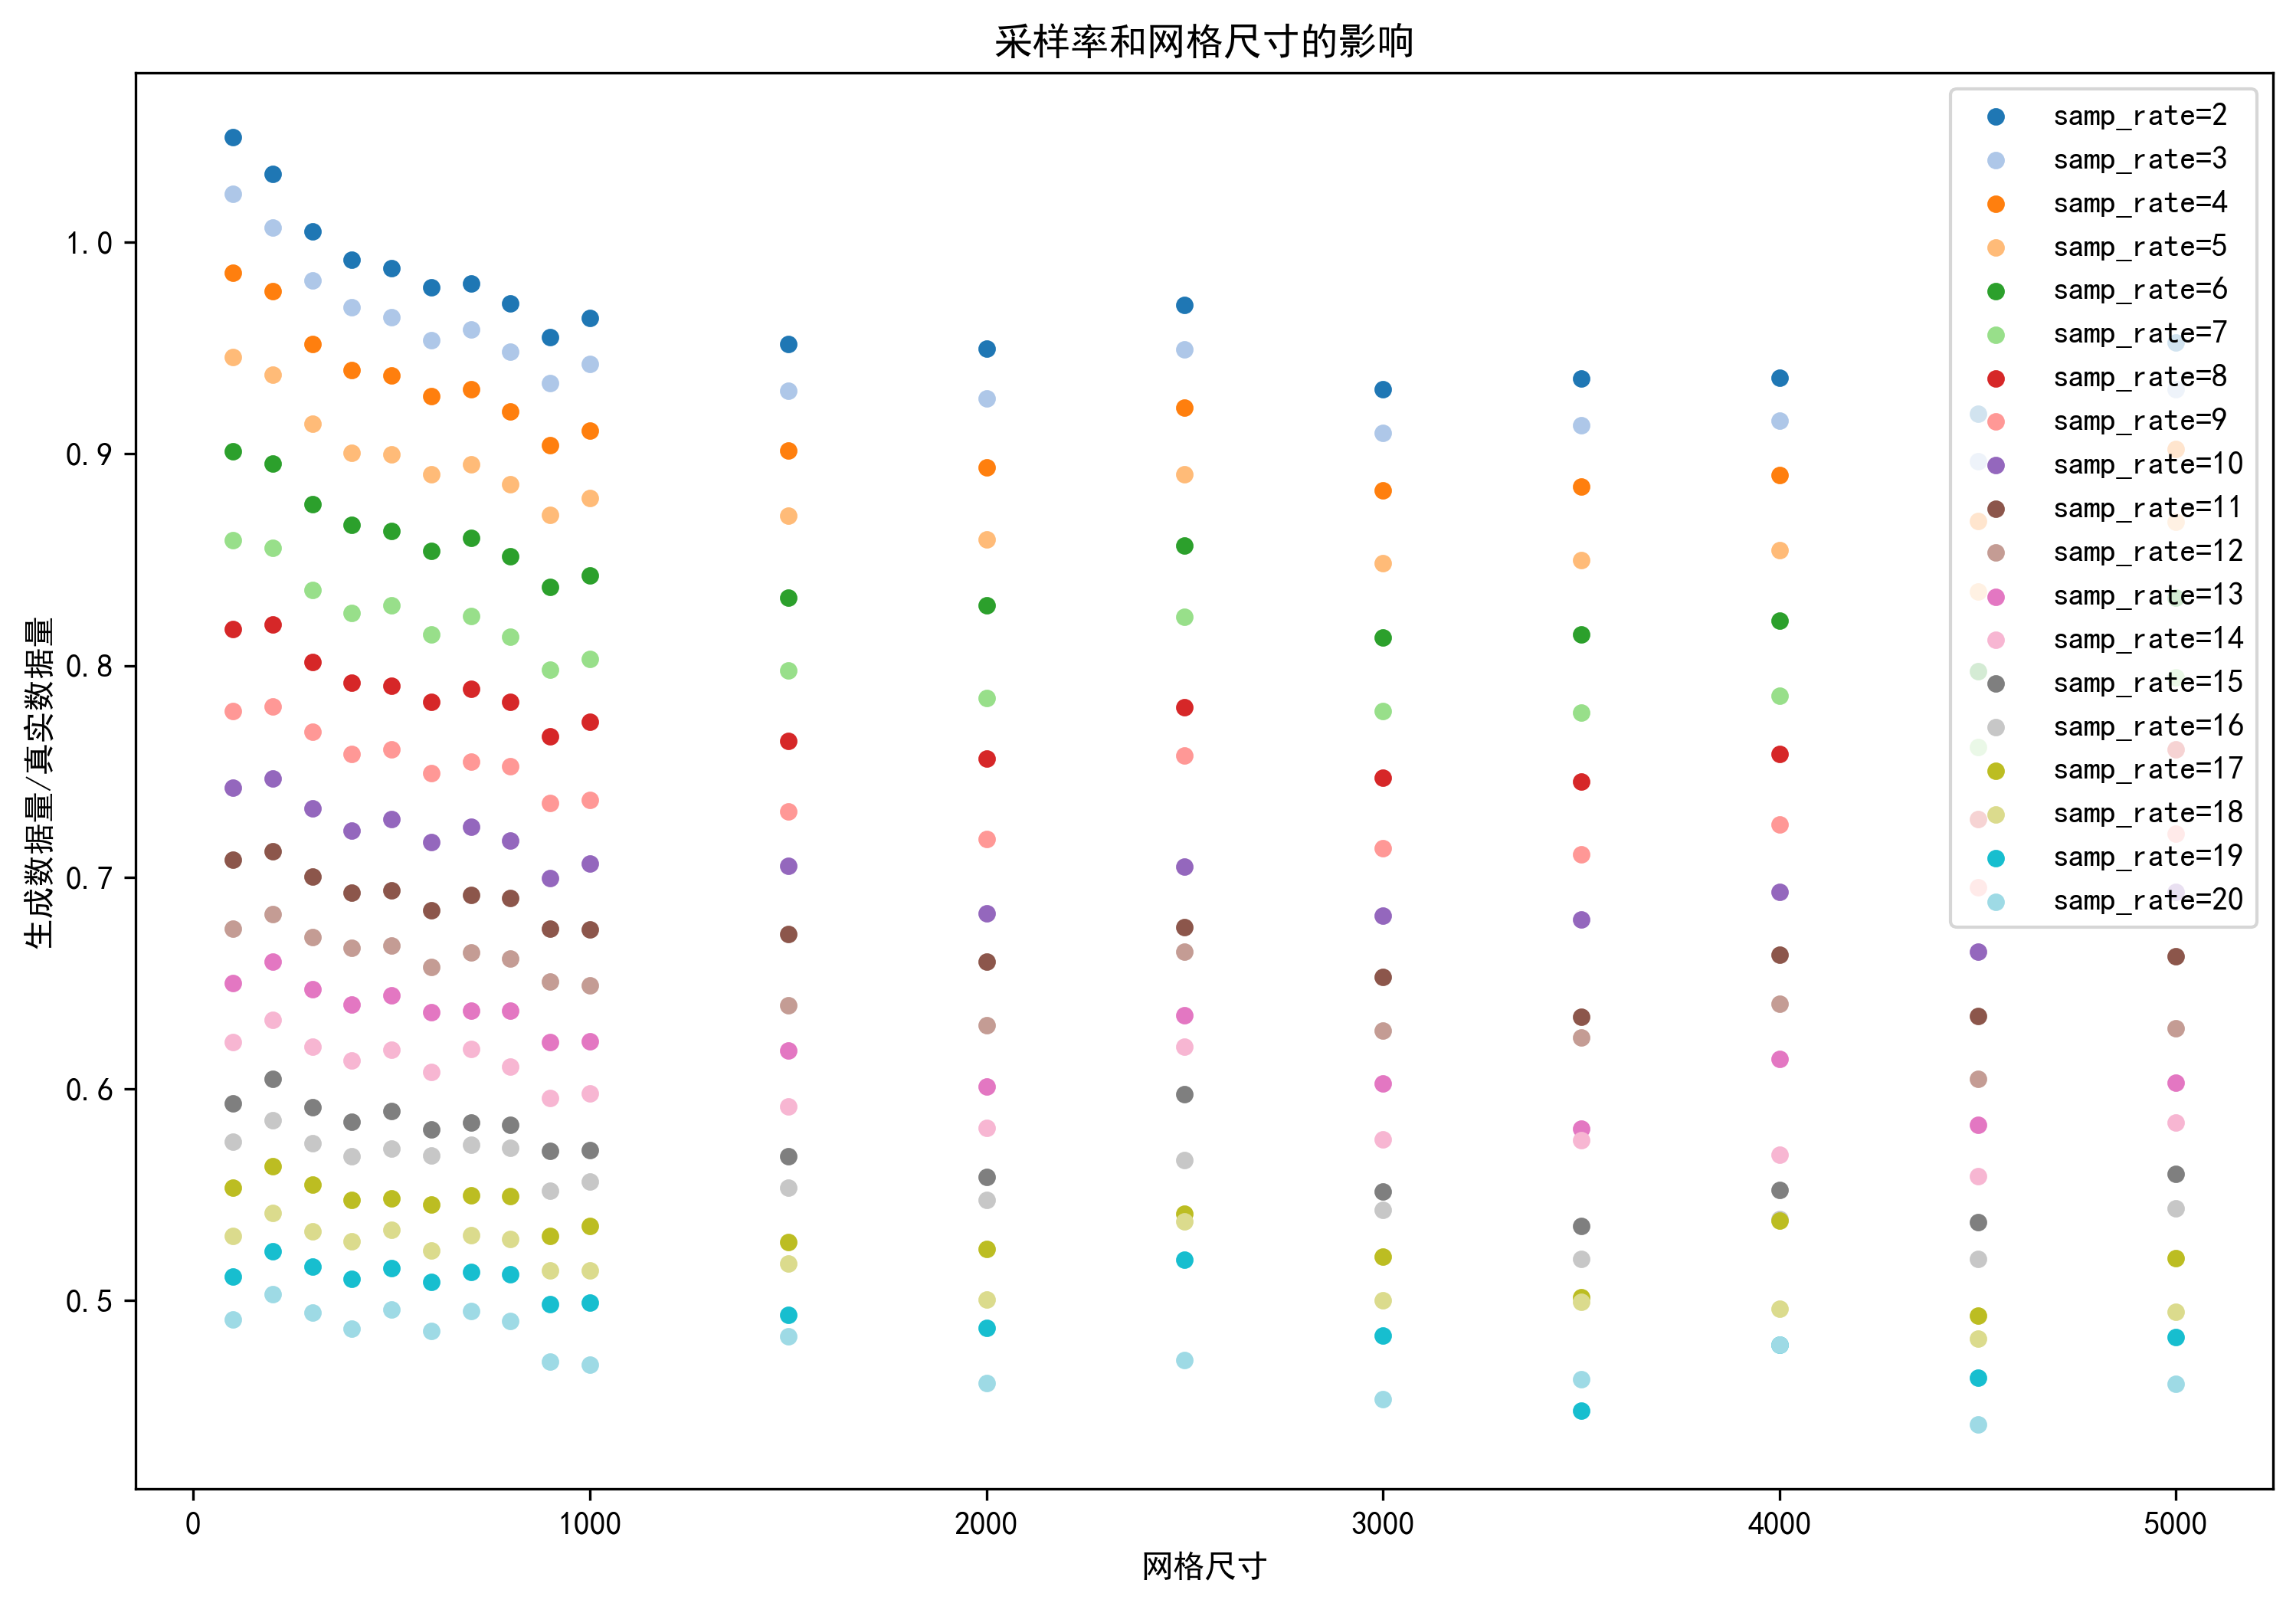

In [137]:
cmap = plt.get_cmap('tab20')
colors = [cmap(i) for i in np.linspace(0, 1, 19)]
fig, ax = plt.subplots(1,1,figsize=(12, 8)) # 可使用GridSpec用法
for samp_rate,color_grid in zip(dff.samp_rate.unique(),colors):
    df = dff.query('samp_rate == {}'.format(samp_rate))
    df.plot(ax=ax, kind='scatter', x='grid_m', y='ratio_new',color=color_grid,label='samp_rate={}'.format(samp_rate))
plt.legend(loc='upper right')
ax.set_xlabel('网格尺寸')
ax.set_ylabel('生成数据量/真实数据量')
ax.set_title('采样率和网格尺寸的影响')
plt.savefig('C:/Users/yongqi/Desktop/采样率和网格尺寸的影响_网格尺寸.jpg',dpi=600)


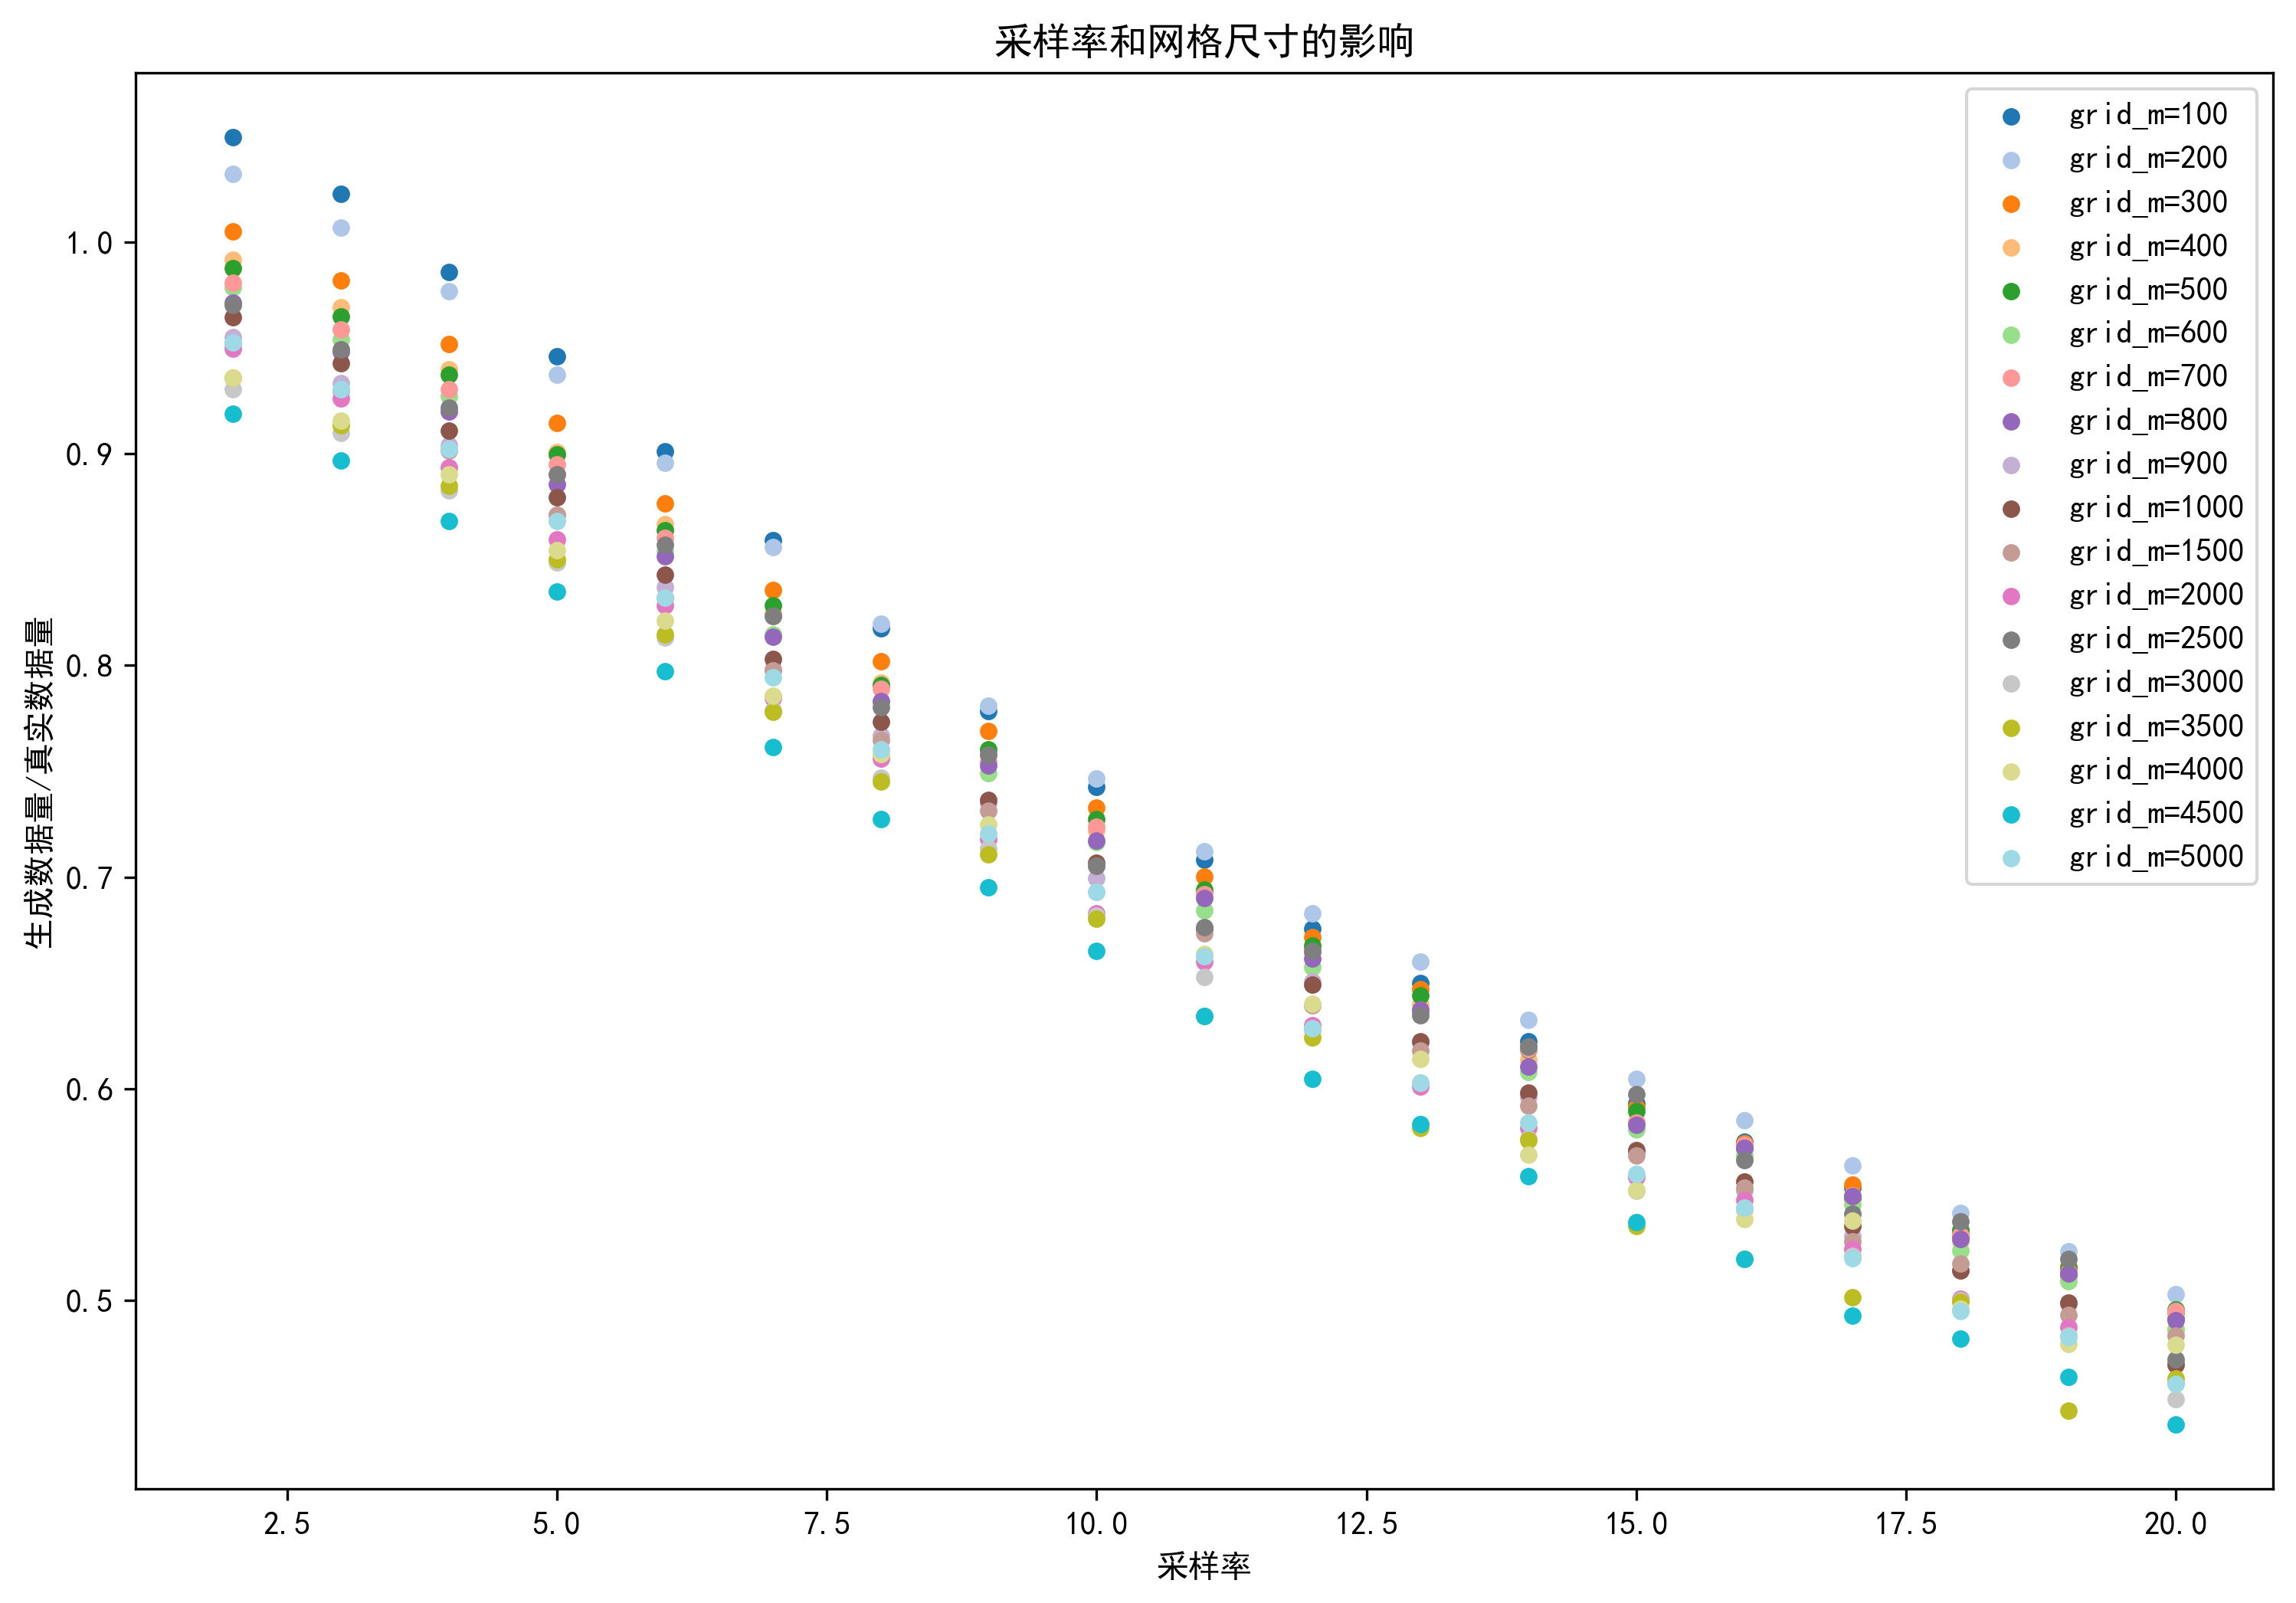

In [138]:
cmap = plt.get_cmap('tab20')
colors = [cmap(i) for i in np.linspace(0, 1, 18)]
fig, ax = plt.subplots(1,1,figsize=(12, 8)) # 可使用GridSpec用法
for grid_m,color_grid in zip(dff.grid_m.unique(),colors):
    df = dff.query('grid_m == {}'.format(grid_m))
    df.plot(ax=ax, kind='scatter', x='samp_rate', y='ratio_new',color=color_grid,label='grid_m={}'.format(grid_m))
plt.legend(loc='best')
ax.set_xlabel('采样率')
ax.set_ylabel('生成数据量/真实数据量')
ax.set_title('采样率和网格尺寸的影响')
plt.savefig('C:/Users/yongqi/Desktop/采样率和网格尺寸的影响_采样率.jpg',dpi=600)